In [121]:
import os
import cv2
import numpy as np


# Leer el archivo CSV del dataset FER-2013



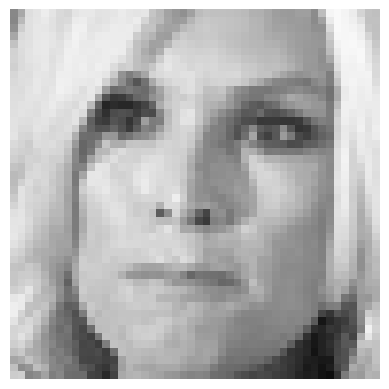

In [122]:
img = cv2.imread(r'train\angry\Training_33331.jpg')
display(img)

In [123]:
def adjust_brightness(img, value=30):
    """Aumenta o disminuye el brillo."""
    hsv = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    hsv = cv2.cvtColor(hsv, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    final_hsv = cv2.merge((h, s, v))
    img_bright = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return cv2.cvtColor(img_bright, cv2.COLOR_BGR2GRAY)

In [124]:
def rotate_image(img, angle):
    """Rota la imagen alrededor de su centro."""
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    return cv2.warpAffine(img, M, (w, h))

In [125]:
def scale_image(img, scale):
    """Escala la imagen (zoom in/out)."""
    h, w = img.shape[:2]
    img_scaled = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    # recorta o rellena para mantener tamaño original
    if scale < 1:
        pad_h = (h - img_scaled.shape[0]) // 2
        pad_w = (w - img_scaled.shape[1]) // 2
        return cv2.copyMakeBorder(img_scaled, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REFLECT)
    else:
        return img_scaled[0:h, 0:w]

In [126]:
img = cv2.imread(r'train\angry\Training_33331.jpg', cv2.IMREAD_GRAYSCALE)
augmented_images = [
    img,
    adjust_brightness(img, 50),
    adjust_brightness(img, -50),
    rotate_image(img, 15),
    rotate_image(img, -15),
    scale_image(img, 1.2),  # zoom in
    scale_image(img, 0.8)   # zoom out
]

In [127]:
brightness_variants = [
    adjust_brightness(img, -80),
    adjust_brightness(img, -50),
    adjust_brightness(img, -20),
    img,  # original
    adjust_brightness(img, 20),
    adjust_brightness(img, 50),
    adjust_brightness(img, 80)
]



In [128]:
rotation_variants = [
    rotate_image(img, -45),
    rotate_image(img, -30),
    rotate_image(img, -15),
    img,  # original
    rotate_image(img, 15),
    rotate_image(img, 30),
    rotate_image(img, 45)
]

In [129]:
scale_variants = [
    scale_image(img, 0.5),  # zoom out fuerte
    scale_image(img, 0.7),
    scale_image(img, 0.9),
    img,  # original
    scale_image(img, 1.1),
    scale_image(img, 1.3),
    scale_image(img, 1.5)   # zoom in fuerte
]

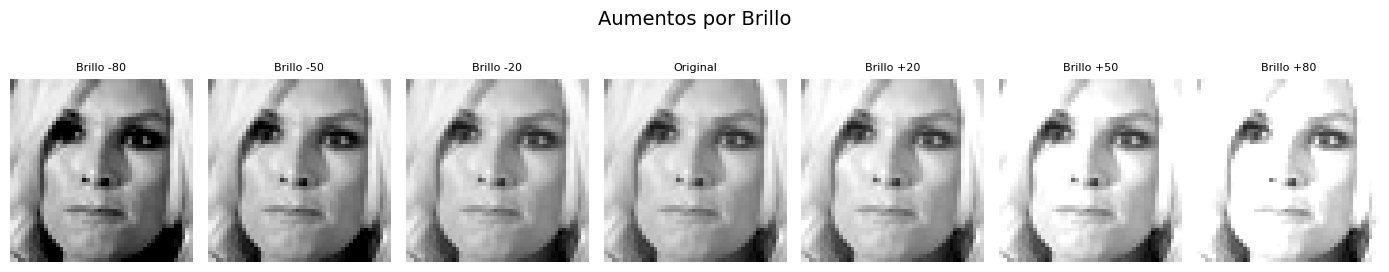

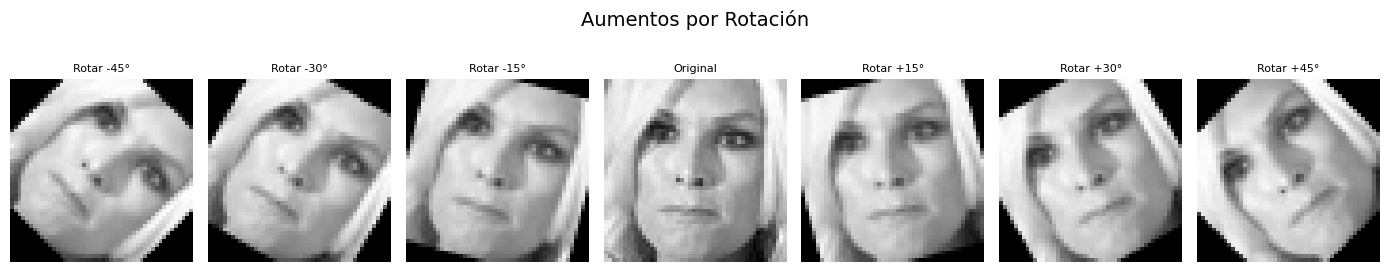

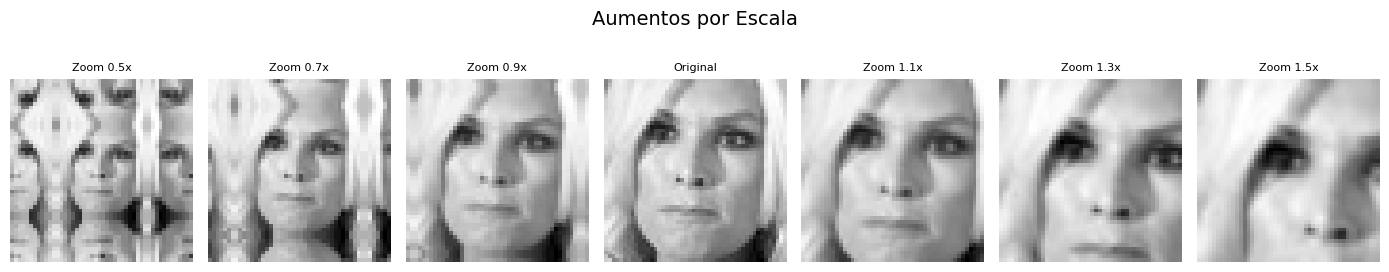

In [130]:
def show_images(images, titles, title_group):
    plt.figure(figsize=(14, 3))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i], fontsize=8)
        plt.axis('off')
    plt.suptitle(title_group, fontsize=14)
    plt.tight_layout()
    plt.show()

# Títulos
brightness_titles = ['Brillo -80', 'Brillo -50', 'Brillo -20', 'Original', 'Brillo +20', 'Brillo +50', 'Brillo +80']
rotation_titles = ['Rotar -45°', 'Rotar -30°', 'Rotar -15°', 'Original', 'Rotar +15°', 'Rotar +30°', 'Rotar +45°']
scale_titles = ['Zoom 0.5x', 'Zoom 0.7x', 'Zoom 0.9x', 'Original', 'Zoom 1.1x', 'Zoom 1.3x', 'Zoom 1.5x']

# Mostrar
show_images(brightness_variants, brightness_titles, "Aumentos por Brillo")
show_images(rotation_variants, rotation_titles, "Aumentos por Rotación")
show_images(scale_variants, scale_titles, "Aumentos por Escala")
